# Step-to -step time evolution:
## Floquet operator:

\begin{equation}
\hat{F} = \int e^{-i\hat{H(t)}}dt
\end{equation}


\begin{equation}
\hat{F} = \exp\left({\frac{-i\tau_z \hat{J_z}^2}{2j+1}-i\alpha_z \hat{J}_z}\right) \times \exp\left({-i\alpha_y \hat{J}_y}\right)
\end{equation}

Where $\tau_z$, $\alpha_z$ and $\alpha_y$ are paramiters $j$ is the absolute value of angular momentum $\hat{J}_y $

In [3]:
    import numpy as np
    from scipy.linalg import expm
    from cmath import polar, phase
    import matplotlib.pyplot as plt

In [4]:
alpha_z = 1
alpha_y= 1
tau_z=1


j=1
N=2*j+1
m=np.array([i for i in range(-j,j+1) ])
print(m)

[-1  0  1]


In [5]:
def time_evo_step(j_0,tau):
    alpha_z = 1
    alpha_y= 1
    tau_z=tau


    j=j_0
    N=2*j+1
    m=np.array([i for i in range(-j,j+1) ])
    
   #contruction F 
    FZ = np.zeros([N,N],dtype=complex)
    for i in range(N):
        FZ[i,i]= np.exp((-1j)*(tau_z*m[i]*m[i]/(N) + alpha_z*m[i]))
    
    #F_y
    JP=np.zeros([N,N],dtype=complex)
    JM=np.zeros([N,N],dtype=complex)
    Jy=np.zeros([N,N],dtype=complex)
    
    for i in m:
        for l in m:
            if(i==l+1):
                JP[np.where(m == i), np.where(m==l)] = np.sqrt(j*(j+1)-l*(l+1))
            if (i==l-1):
                JM[np.where(m == i), np.where(m==l)]= np.sqrt(j*(j+1)-l*(l-1))
    
    Jy= (JP - JM)*(-1j)/2
    
    FY=expm(alpha_y*(-1j)*Jy)
    
    F= np.matmul(FZ,FY)
    EV= np.linalg.eigvals(F)
    ang=np.sort(np.array([np.angle(EV[i])for i in range(len(EV))]))
    return (ang)

In [7]:
start = time_evo_step(100,1)
start

array([-3.13728015, -3.12329917, -3.08595124, -3.03123978, -3.02142284,
       -3.0206815 , -2.95520918, -2.92901093, -2.92821379, -2.92695257,
       -2.75886485, -2.7232207 , -2.70652511, -2.69741008, -2.6836502 ,
       -2.66435112, -2.60264442, -2.54392929, -2.53961654, -2.44403426,
       -2.44086652, -2.41837268, -2.40302163, -2.39561054, -2.340064  ,
       -2.29097905, -2.26375036, -2.26096939, -2.23865154, -2.21976039,
       -2.21059798, -2.18454487, -2.15516277, -2.0538    , -2.02689693,
       -1.91560888, -1.90922278, -1.90603255, -1.88564198, -1.82980136,
       -1.81174307, -1.75714354, -1.73939542, -1.65925434, -1.65714709,
       -1.6484562 , -1.64612494, -1.63696316, -1.62507705, -1.60920039,
       -1.59694883, -1.5905618 , -1.51005285, -1.48705368, -1.45187368,
       -1.39009294, -1.37576978, -1.37041332, -1.35611298, -1.27650011,
       -1.26063309, -1.21692054, -1.21304764, -1.17367336, -1.13631128,
       -1.05325556, -1.03886751, -1.03133958, -0.99100719, -0.90

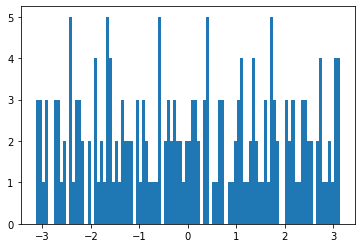

In [8]:
plt.hist(start,bins=100)
plt.show()

In [9]:
start

array([-3.13728015, -3.12329917, -3.08595124, -3.03123978, -3.02142284,
       -3.0206815 , -2.95520918, -2.92901093, -2.92821379, -2.92695257,
       -2.75886485, -2.7232207 , -2.70652511, -2.69741008, -2.6836502 ,
       -2.66435112, -2.60264442, -2.54392929, -2.53961654, -2.44403426,
       -2.44086652, -2.41837268, -2.40302163, -2.39561054, -2.340064  ,
       -2.29097905, -2.26375036, -2.26096939, -2.23865154, -2.21976039,
       -2.21059798, -2.18454487, -2.15516277, -2.0538    , -2.02689693,
       -1.91560888, -1.90922278, -1.90603255, -1.88564198, -1.82980136,
       -1.81174307, -1.75714354, -1.73939542, -1.65925434, -1.65714709,
       -1.6484562 , -1.64612494, -1.63696316, -1.62507705, -1.60920039,
       -1.59694883, -1.5905618 , -1.51005285, -1.48705368, -1.45187368,
       -1.39009294, -1.37576978, -1.37041332, -1.35611298, -1.27650011,
       -1.26063309, -1.21692054, -1.21304764, -1.17367336, -1.13631128,
       -1.05325556, -1.03886751, -1.03133958, -0.99100719, -0.90

In [10]:
ang_d= np.array([start[i+1]-start[i] for i in range(len(start)-1)])
ang_d

array([0.01398099, 0.03734792, 0.05471147, 0.00981694, 0.00074133,
       0.06547232, 0.02619825, 0.00079714, 0.00126122, 0.16808772,
       0.03564414, 0.01669559, 0.00911503, 0.01375988, 0.01929908,
       0.0617067 , 0.05871513, 0.00431275, 0.09558228, 0.00316774,
       0.02249384, 0.01535105, 0.00741109, 0.05554654, 0.04908495,
       0.0272287 , 0.00278097, 0.02231785, 0.01889115, 0.00916242,
       0.02605311, 0.02938209, 0.10136277, 0.02690307, 0.11128804,
       0.0063861 , 0.00319023, 0.02039056, 0.05584062, 0.01805829,
       0.05459953, 0.01774812, 0.08014107, 0.00210726, 0.00869088,
       0.00233126, 0.00916178, 0.01188611, 0.01587667, 0.01225156,
       0.00638703, 0.08050896, 0.02299917, 0.03518   , 0.06178074,
       0.01432316, 0.00535646, 0.01430034, 0.07961286, 0.01586702,
       0.04371255, 0.00387291, 0.03937428, 0.03736208, 0.08305572,
       0.01438805, 0.00752793, 0.04033238, 0.08698212, 0.00212   ,
       0.00958859, 0.01791013, 0.01893726, 0.0621858 , 0.07697

<function matplotlib.pyplot.show(*args, **kw)>

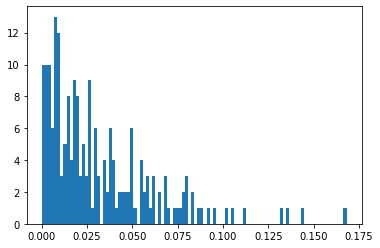

In [11]:
plt.hist(ang_d, bins=100)
plt.show

In [12]:
start = time_evo_step(100,15)

In [13]:
ang_d= np.array([start[i+1]-start[i] for i in range(len(start)-1)])
ang_d

array([0.02813196, 0.03163748, 0.03869169, 0.02791183, 0.04066722,
       0.02969146, 0.00738274, 0.04770857, 0.01634402, 0.03376127,
       0.0330651 , 0.01313673, 0.03843071, 0.03183251, 0.01556268,
       0.01560859, 0.06563485, 0.02885938, 0.04041906, 0.04910435,
       0.03591728, 0.04479792, 0.01907143, 0.02485144, 0.01184148,
       0.03932178, 0.01547746, 0.01853142, 0.06426683, 0.00706467,
       0.02817567, 0.02964842, 0.05612959, 0.02556323, 0.01461776,
       0.05032779, 0.02119442, 0.03753741, 0.02152589, 0.01169431,
       0.03294923, 0.05296123, 0.03358247, 0.02618915, 0.0698812 ,
       0.01092363, 0.04461609, 0.04826638, 0.01786579, 0.03718623,
       0.02295183, 0.02797361, 0.02998957, 0.04067825, 0.0307753 ,
       0.05390135, 0.01719503, 0.0295889 , 0.01811918, 0.03528127,
       0.03886666, 0.03260289, 0.0121821 , 0.05287622, 0.01384293,
       0.03605613, 0.0167644 , 0.04387621, 0.0158193 , 0.07494543,
       0.02760948, 0.01397141, 0.02562691, 0.03905458, 0.03044

<function matplotlib.pyplot.show(*args, **kw)>

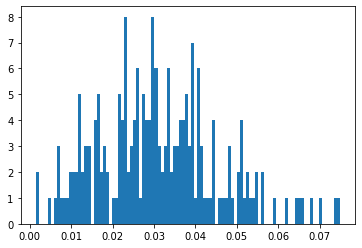

In [14]:
plt.hist(ang_d, bins=100)
plt.show

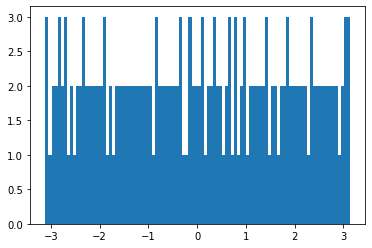

In [15]:
plt.hist(start,bins=100)
plt.show()

In [37]:
from scipy.stats import ortho_group
j=500
N=2*j+1
Rand = ortho_group.rvs(N)
print(Rand)
EVR= np.linalg.eigvals(Rand)
angm=np.sort(np.array([np.angle(EVR[i])for i in range(len(EVR))]))

[[ 0.01000901  0.03247567 -0.02840686 ...  0.032586    0.00238774
   0.01691667]
 [ 0.00845858  0.02648553  0.02847264 ...  0.04400698 -0.06755733
   0.0218904 ]
 [ 0.03813953 -0.0351107   0.06820695 ... -0.04609845 -0.02755944
  -0.07544434]
 ...
 [ 0.04111102 -0.01981168 -0.02715602 ...  0.01933561 -0.02794958
   0.04193826]
 [-0.05481854 -0.04112336 -0.04125076 ... -0.00317383  0.05365534
  -0.0142188 ]
 [-0.01980701 -0.00308371  0.00608853 ... -0.0225049  -0.01218956
   0.02187851]]


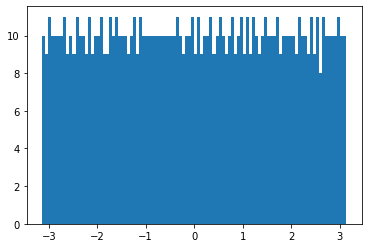

In [38]:
plt.hist(angm,bins=100)
plt.show()

In [39]:
ang_dm= np.array([angm[i+1]-angm[i] for i in range(len(angm)-1)])

<function matplotlib.pyplot.show(*args, **kw)>

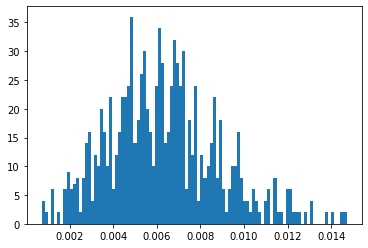

In [40]:
plt.hist(ang_dm, bins=100)
plt.show

In [41]:
import random
Randiag = np.zeros((N, N), dtype=complex)
R = np.zeros((N), dtype=complex)
for i in range(N):
    R[i]=1j*random.uniform(0,2*np.pi)
np.fill_diagonal(Randiag,np.exp(R))
EVRZ= np.linalg.eigvals(Randiag)
angmz=np.sort(np.array([np.angle(EVRZ[i])for i in range(len(EVRZ))]))

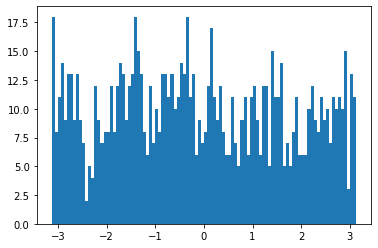

In [42]:
plt.hist(angmz,bins=100)
plt.show()

In [45]:
ang_dmz= np.array([(angmz[i+1]-angmz[i])*N/(2*np.pi) for i in range(len(angmz)-1)])

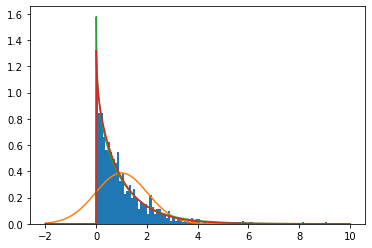

In [53]:
plt.hist(ang_dmz, density=True, bins=100)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ang_dmz))

# lets try the normal distribution first
z, s = stats.norm.fit(ang_dmz) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, z, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
# exactly same as above
ag,bg,cg = stats.gamma.fit(ang_dmz)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ang_dmz)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show()  

In [47]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

/home/bento/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/bento/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


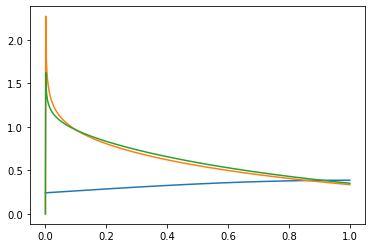

In [49]:
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ang_dmz))
z, s = stats.norm.fit(ang_dmz) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, z, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
# exactly same as above
ag,bg,cg = stats.gamma.fit(ang_dmz)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ang_dmz)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show()  